# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = '/home/srikant/self_driving_car/traffic-signs/train.p'
testing_file = '/home/srikant/self_driving_car/traffic-signs/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print("completed")

completed


In [2]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = len(y_train)

# TODO: number of testing examples
n_test = len(y_test)

# TODO: what's the shape of an image?
image_shape = X_test[1].shape

# TODO: how many classes are in the dataset
n_classes = len(set(y_test))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

print("completed")

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
completed


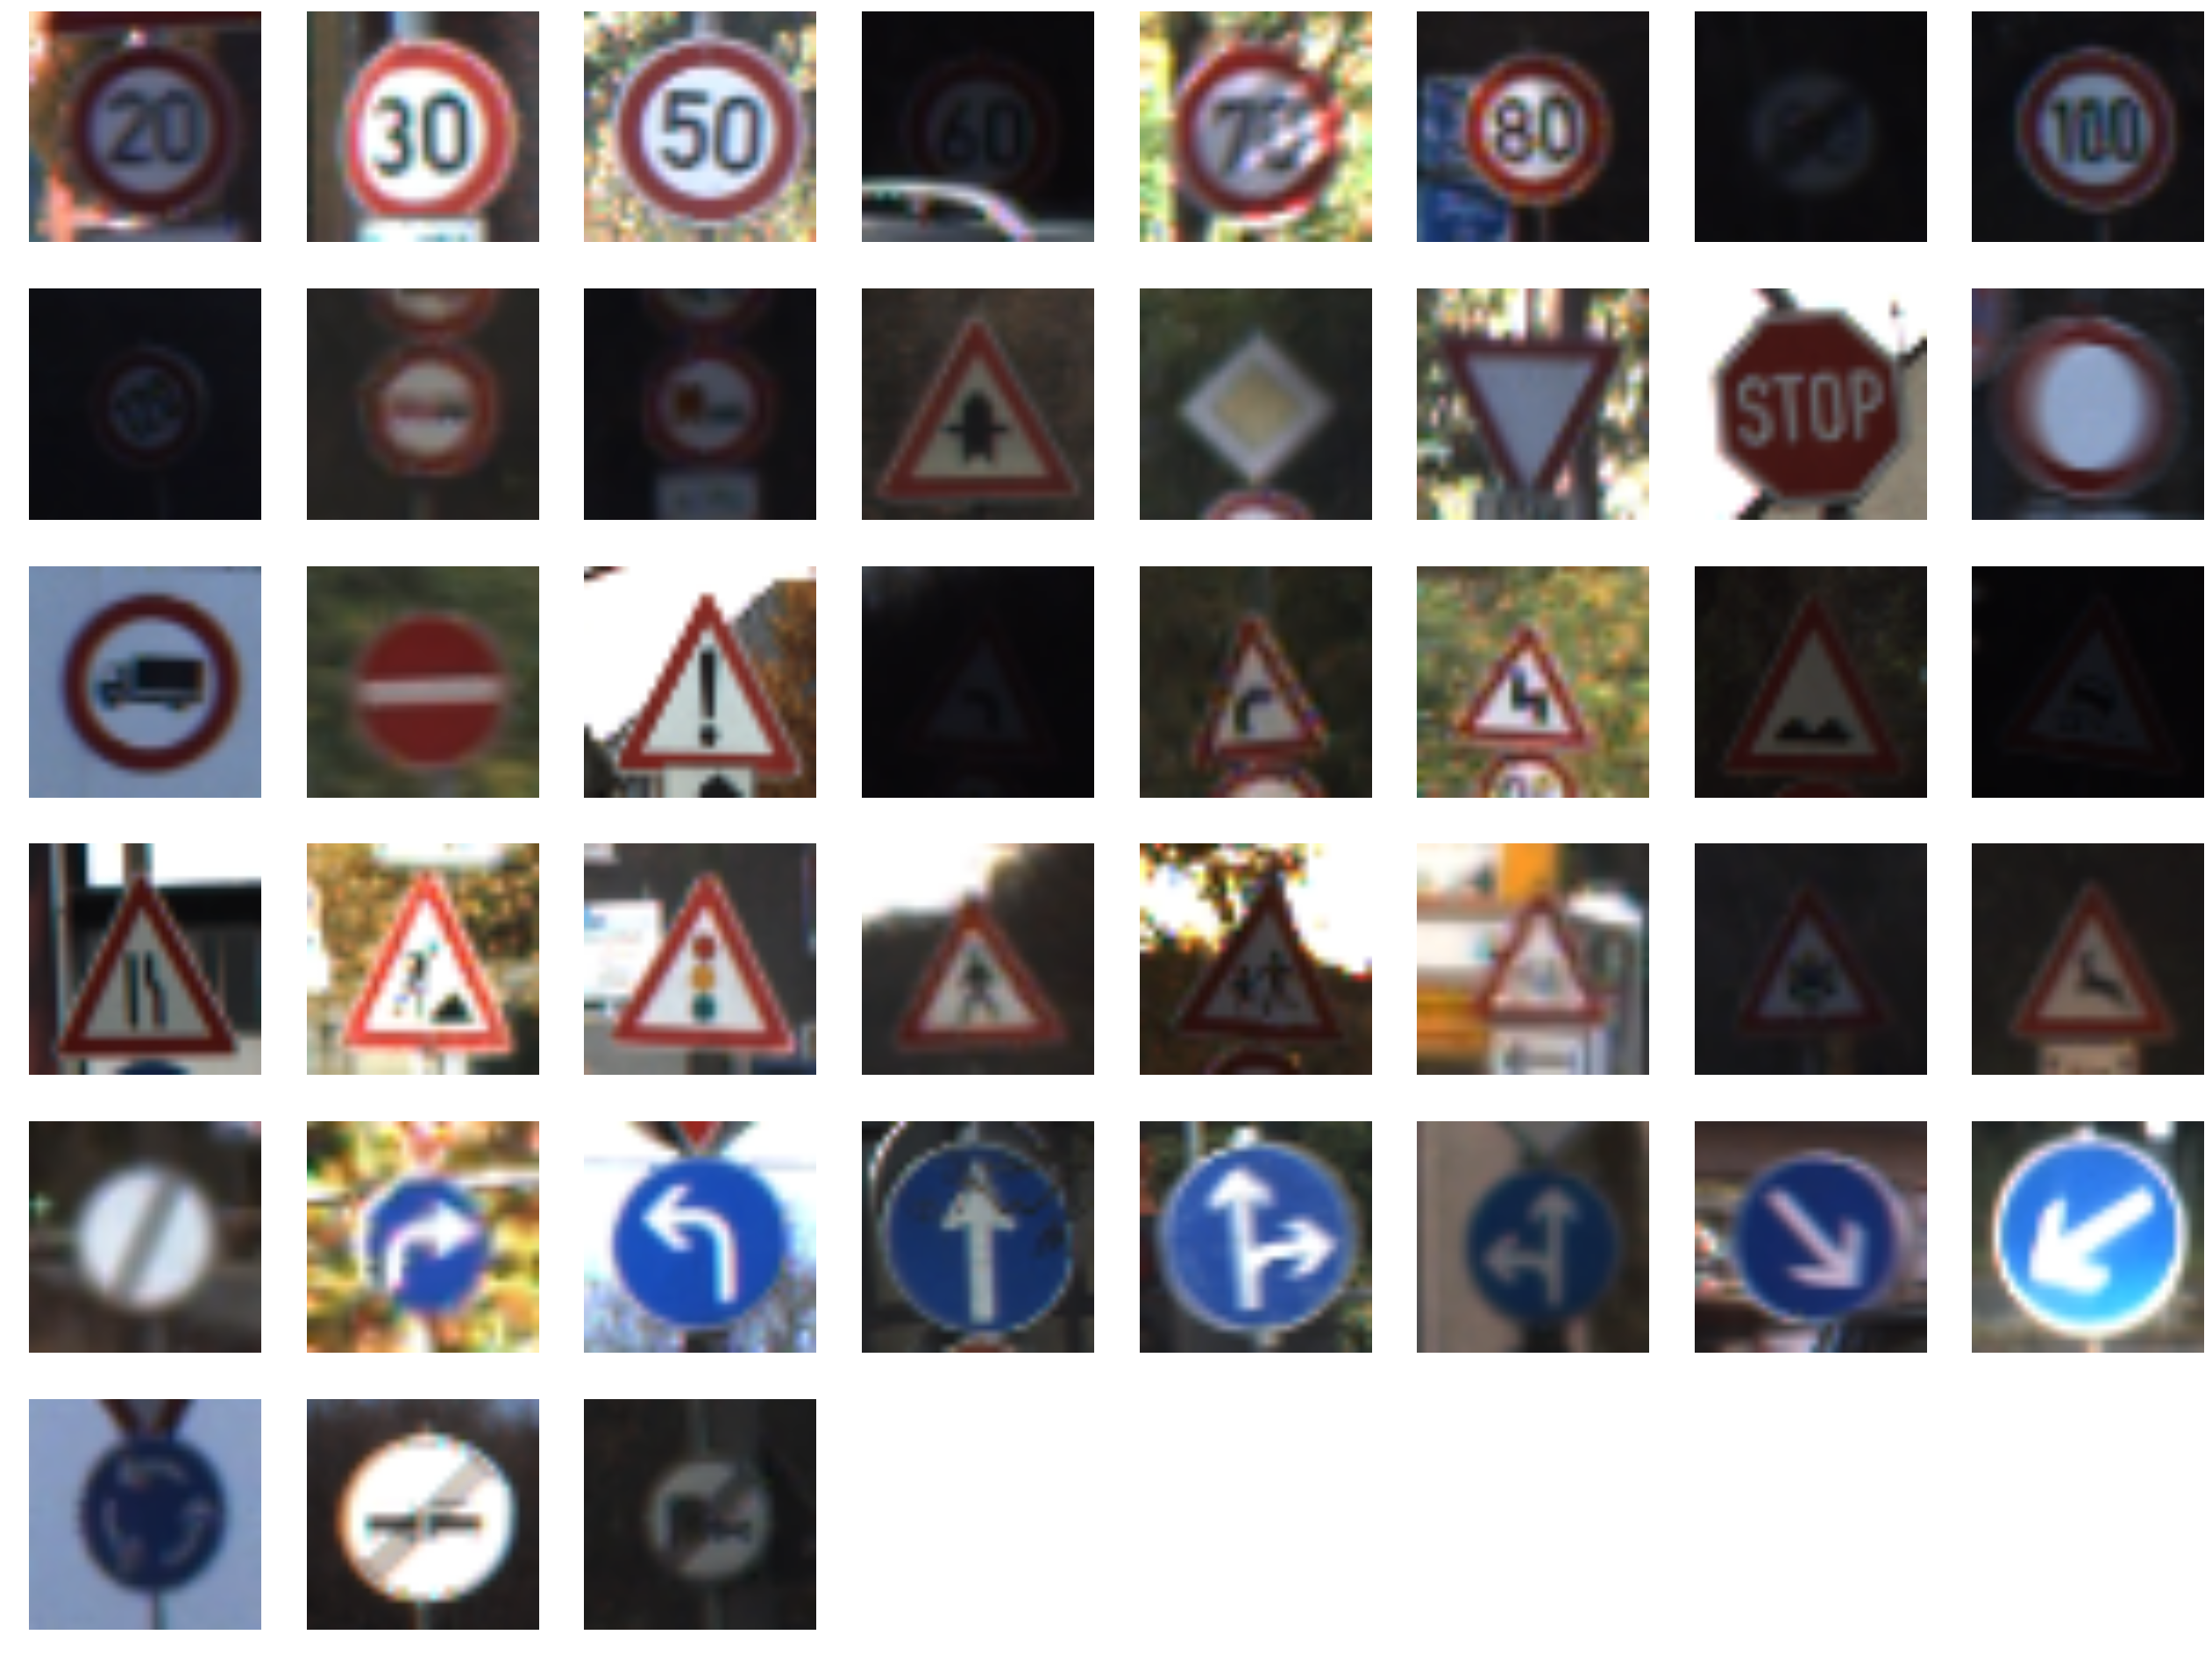

completed


In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt
import numpy as np

# What is the type of label -- might need to convert it to One Hot Encoding 

# A method to look at all the different unique labels 

def unique_images(images, labels):
    unique_labels = set(labels)
    plt.figure(figsize=(32, 32))
    i = 1
    for label in unique_labels:
        # Pick the first image for each label.
        index = np.argwhere(labels == label)[0][0]
        image = images[index]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        i += 1
        _ = plt.imshow(image)
    plt.show()

unique_images(X_test, y_test)

print("completed")

# WHy does the paper say that moving to greyscale provides better accuracy --> they are of different color ?

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# Confirm that the conversion has been done 
print(X_train.shape)

# Normalize the images using the normalize function from earlier 

def normalize_greyscale(image_data,a=0.1,b=0.9,xmin=0,xmax=255):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # ToDo: Implement Min-Max scaling for greyscale image data
    norm_image_data = a + ((image_data-xmin)*b)/(xmax-xmin)
    return norm_image_data


X_train = normalize_greyscale(X_train)
X_test = normalize_greyscale(X_test)

print("completed")

(39209, 32, 32, 3)
completed


### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:** I experimented with two techniques to pre-process the data 
1. Convert images to greyscale - LeCun et al suggest that converting the image to greyscale increased their classification accuracy --> This however led to reduced accuracy. 

2. Local Normalization of all the images - I used the normalization function discussed in the lab as this helps with poor contrast, glare etc . ( From looking at the unique images, it seems that lighting conditions are very different for the samples).

In [5]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# First part -- I am going to try One Hot Encoding based technique 
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

print("completed")

completed


In [6]:
# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
y_train = y_train.astype(np.float32)
y_test  = y_test.astype(np.float32)
# Check the conversion to floating point 

print(y_train[0])

print("completed")

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]
completed


In [7]:
# Split the data into training and validation features and labels - Use technique from Lab
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.05,random_state=832289)

print("completed")


completed


In [8]:
#############################################################################################
######### PROCESSING THE NEW IMAGE DATA ###############################################
########################################################################################
import matplotlib.image as mpimg
import skimage.transform

new_labels = [40,22,25,17,4,26,1,7,4]
orig_labels = new_labels
images = []

# Add all the images
images.append(mpimg.imread('/home/srikant/self_driving_car/traffic-signs/new_images/roundabout_40.jpg'))
images.append(mpimg.imread('/home/srikant/self_driving_car/traffic-signs/new_images/bumpy_road_22.ppm'))
images.append(mpimg.imread('/home/srikant/self_driving_car/traffic-signs/new_images/road_work_25.jpg'))
images.append(mpimg.imread('/home/srikant/self_driving_car/traffic-signs/new_images/no_entry_17.jpg'))
images.append(mpimg.imread('/home/srikant/self_driving_car/traffic-signs/new_images/speedlimit_4_2.ppm'))
images.append(mpimg.imread('/home/srikant/self_driving_car/traffic-signs/new_images/traffic_signals_26.ppm'))
images.append(mpimg.imread('/home/srikant/self_driving_car/traffic-signs/new_images/speedlimit_1.png'))
images.append(mpimg.imread('/home/srikant/self_driving_car/traffic-signs/new_images/speedlimit_7.png'))
images.append(mpimg.imread('/home/srikant/self_driving_car/traffic-signs/new_images/speedlimit_4.png'))



images32 = [skimage.transform.resize(image, (32, 32,3)) for image in images]

images32 = np.asarray(images32,dtype=float)

print(images32.shape)

print(images32[0].max())

new_labels = encoder.transform(new_labels)
new_labels = new_labels.astype(np.float32)

print(new_labels[8])

images32 = normalize_greyscale(images32,a=0.1,xmax=1.0,xmin=0.0)

print(images32[0][0][0])

################################## END OF NEW IMAGE ###########################################################

(9, 32, 32, 3)
1.0
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]
[ 1.  1.  1.]


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:** No additional data was generated yet. The next iteration will include jittered data of the input set so as to further improve the generalized classification. 
The training dataset was split into two dataset for training and validation using randomized sampling. The sklearn API was used to create these datasets.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


In [11]:
import tensorflow as tf

k_output = 64

# Image Properties
image_width = 32
image_height = 32

# Convolution filter
filter_size_width = 5
filter_size_height = 5

epochs = 10
batch_size = 100
learning_rate = 0.1


input = tf.placeholder(tf.float32, shape=[None, image_width, image_height,3])
labels = tf.placeholder(tf.float32)

# Weight and bias
weight = tf.Variable(tf.truncated_normal([filter_size_width, filter_size_height,3, k_output],mean=0.0,stddev=0.02))
bias = tf.Variable(tf.zeros(k_output))

conv_layer = tf.nn.conv2d(input, weight, strides=[1, 2, 2,1], padding='SAME')
conv_layer = tf.nn.bias_add(conv_layer, bias)
conv_layer = tf.nn.relu(conv_layer)

print(conv_layer.get_shape(),"conv1-dim")


pool1 = tf.nn.max_pool(conv_layer, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1],
                         padding='SAME', name='pool1')
print(pool1.get_shape(),"pool1-dim")

norm1 = tf.nn.lrn(pool1, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name='norm1')

print(norm1.get_shape(),"norm1-dim")


num_of_samples = tf.Variable(batch_size,tf.float32)

reshape = tf.reshape(norm1,[num_of_samples,4096])

print(reshape.get_shape())

final_weights = tf.Variable(tf.truncated_normal([4096,43], mean=0.0, stddev=0.02, dtype=tf.float32, seed=None, name=None))
final_biases =  tf.Variable(tf.zeros([43], tf.float32))

# Linear Function WX + b
logits = tf.matmul(reshape, final_weights) + final_biases

prediction = tf.nn.softmax(logits)

# Top5 predictions using topK 

topFive = tf.nn.top_k(prediction,5,sorted=True,name='topFive')

prediction =tf.clip_by_value(prediction,1e-10,1.0)

# Cross entropy
cross_entropy = -tf.reduce_sum(labels * tf.log(prediction), reduction_indices=1)

# Training loss
loss = tf.reduce_mean(cross_entropy)

print("Model Creation completed")

(?, 16, 16, 64) conv1-dim
(?, 8, 8, 64) pool1-dim
(?, 8, 8, 64) norm1-dim
(?, 4096)
Model Creation completed


**Answer:** The type of model used is answered below as well 

Number of layers - 1 CNN layer followed by a ReLU. This is followed by pooling and localized normalization. This is then provided as an input to a logistic regression classifier which uses a softmax classification technique. The loss function to be optimized is a cross-entropy loss function. 

One Important Aspect - The cross-entropy loss function had a "clipped" log function. This was done because the accuracy would increase and then fall precipitously to low values. The forums indicated that this problem can be avoided by bounding the log output on the predicted values. This indeed helps and the final accuracy on the validation dataset was at 96% using this model.

#### Modified based on feedback -- Pt No 1  #########################################

Size of the different layers assuming a single input training point ( the first index is 1 in this illustration but it depends on the batch_size input to the feed_dict value during a session).

1. Input Image Dimensions - (1,32,32,3)
2. Conv Layer Dimensions - (1,16,16,64). The depth of the convolution is 64 and the stride used was [1,2,2,1] and the Pooling type was "SAME".
3. The output of the Max Pooling and the Local Normalization layer has dimensions (1,8,8,64)
4. The output of the local norm is then reshaped to make it suitable for logistic regression using a linear function to (1,4096)
5. Logistic Regression combined with Softmax and Cross Entryopy - The W matrix has dimensions (4096,43) and the bias is a column vector of length 43. The resulting value is then compared with the One Hot Encoded Labels. 
The lines below show the changes in the dimension through the network - 

Input(1,32,32,3) --> Conv2D + Activation (ReLU)(1,16,16,64) --> Pooling(1,8,8,64) --> Local Norm(1,8,8,64)--> Reshape(1,4096) --> Logistic Regression (1,43) which is now compared with One Hot Encoded Labels for loss function optimization. 

#### End of Modification ########################################
 



Tests Passed!
Accuracy function created.


Epoch  2/10:   0%|          | 0/373 [00:00<?, ?batches/s]

Validation accuracy at 0.49668535590171814
New accuracy at 0.3333333432674408
Testing accuracy at 0.4957044720649719


Epoch  3/10:   0%|          | 0/373 [00:00<?, ?batches/s]

Validation accuracy at 0.7526772022247314
New accuracy at 0.3333333432674408
Testing accuracy at 0.720038652420044


Epoch  4/10:   0%|          | 0/373 [00:00<?, ?batches/s]

Validation accuracy at 0.7848036885261536
New accuracy at 0.3333333432674408
Testing accuracy at 0.7719877362251282


Epoch  5/10:   0%|          | 0/373 [00:00<?, ?batches/s]

Validation accuracy at 0.8408975005149841
New accuracy at 0.3333333432674408
Testing accuracy at 0.8892826437950134


Epoch  6/10:   0%|          | 0/373 [00:00<?, ?batches/s]

Validation accuracy at 0.8944416046142578
New accuracy at 0.3333333432674408
Testing accuracy at 0.9126396179199219


Epoch  7/10:   0%|          | 0/373 [00:00<?, ?batches/s]

Validation accuracy at 0.9388067126274109
New accuracy at 0.4444444477558136
Testing accuracy at 0.9384127855300903


Epoch  8/10:   0%|          | 0/373 [00:00<?, ?batches/s]

Validation accuracy at 0.9449260830879211
New accuracy at 0.4444444477558136
Testing accuracy at 0.9510846138000488


Epoch  9/10:   0%|          | 0/373 [00:00<?, ?batches/s]

Validation accuracy at 0.9515553116798401
New accuracy at 0.4444444477558136
Testing accuracy at 0.960615336894989


Epoch 10/10:   0%|          | 0/373 [00:00<?, ?batches/s]

Validation accuracy at 0.9520652890205383
New accuracy at 0.4444444477558136
Testing accuracy at 0.9667096138000488


Epoch 10/10: 100%|██████████| 373/373 [01:25<00:00,  4.36batches/s]


Validation accuracy at 0.9581845998764038
New accuracy at 0.4444444477558136
Testing accuracy at 0.9722669720649719


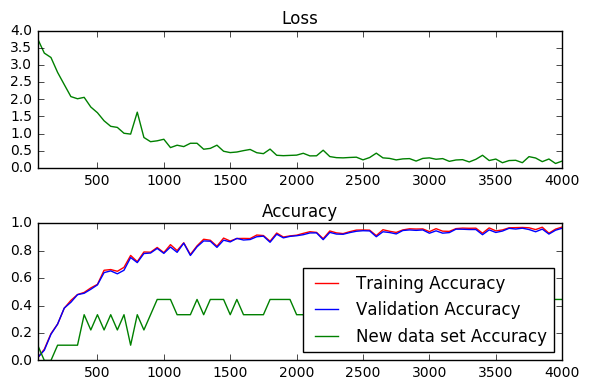

Validation accuracy at 0.9581845998764038
The optimization took  13.896711283333333  minutes


In [12]:
### Train your model here.
### Feel free to use as many code cells as needed.
from datetime import datetime
import math
from tqdm import tqdm

# Create an operation that initializes all variables
init = tf.initialize_all_variables()

# Feed dicts for training, validation, and test session
train_feed_dict = {input: X_train, labels: y_train, num_of_samples: len(y_train)}
valid_feed_dict = {input: X_valid, labels: y_valid, num_of_samples: len(y_valid)}
test_feed_dict = {input: X_test, labels:y_test, num_of_samples: len(y_test)}


# FEED FOR THE NEW DATA THAT HAS BEEN ADDED 
new_feed_dict = {input: images32, labels: new_labels, num_of_samples: 9}

# Test Cases
with tf.Session() as session:
    session.run(init)
    session.run(loss, feed_dict=train_feed_dict)
    session.run(loss, feed_dict=valid_feed_dict)
    session.run(loss, feed_dict=test_feed_dict)
    biases_data = session.run(final_biases)

print('Tests Passed!')
#
# Determine if the predictions are correct
is_correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(labels, 1))
# Calculate the accuracy of the predictions
accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

print('Accuracy function created.')

# ToDo: Find the best parameters for each configuration


### DON'T MODIFY ANYTHING BELOW ###
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# The accuracy measured against the validation set
validation_accuracy = 0.0

# Measurements use for graphing loss and accuracy
log_batch_step = 50
batches = []
loss_batch = []
train_acc_batch = []
valid_acc_batch = []
new_acc_batch = []

starttime = datetime.now()

with tf.Session() as session:
    session.run(init)
    batch_count = int(math.ceil(len(X_train) / batch_size))

    for epoch_i in range(epochs):

        # Progress bar
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i + 1, epochs), unit='batches')

        # The training cycle
        for batch_i in batches_pbar:
            # Get a batch of training features and labels
            batch_start = batch_i * batch_size
            batch_features = X_train[batch_start:batch_start + batch_size]
            batch_labels = y_train[batch_start:batch_start + batch_size]

            # Run optimizer and get loss
            _, l = session.run(
                [optimizer, loss],
                feed_dict={input: batch_features, labels: batch_labels, num_of_samples: len(batch_labels)})

            # Log every 50 batches
            if not batch_i % log_batch_step:
                # Calculate Training and Validation accuracy
                training_accuracy = session.run(accuracy, feed_dict=train_feed_dict)
                validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)
                top5,is_correct, predicted, new_accuracy = session.run([topFive,is_correct_prediction, prediction, accuracy],
                                                                  feed_dict=new_feed_dict)
                # Log batches
                previous_batch = batches[-1] if batches else 0
                batches.append(log_batch_step + previous_batch)
                loss_batch.append(l)
                train_acc_batch.append(training_accuracy)
                valid_acc_batch.append(validation_accuracy)
                new_acc_batch.append(new_accuracy)

        # Check accuracy against Validation data
        validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)
        print('Validation accuracy at {}'.format(validation_accuracy))
        print('New accuracy at {}'.format(new_accuracy))
        print('Testing accuracy at {}' .format(training_accuracy))
loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(batches, loss_batch, 'g')
loss_plot.set_xlim([batches[0], batches[-1]])
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(batches, train_acc_batch, 'r', label='Training Accuracy')
acc_plot.plot(batches, valid_acc_batch, 'b', label='Validation Accuracy')
acc_plot.plot(batches,new_acc_batch,'g',label='New data set Accuracy')
acc_plot.set_ylim([0, 1.0])
acc_plot.set_xlim([batches[0], batches[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()

print('Validation accuracy at {}'.format(validation_accuracy))

stoptime = datetime.now()

runtime = stoptime - starttime 

print("The optimization took ",(runtime.total_seconds()/60),' minutes')

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

Type of Optimizer - Used a stochastic gradient descent based next step search 
Batch Size - 100
number of Epochs - 10 

Other relevant hyper-parameters - learning rate was set to 0.1. The next step is to enable exponentially decaying learning rate with Momentum based optimizer. 

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:** Approach to solving this problem

Step 1 - Visualize the dataset - There are 43 unique signs. Plotting these unique images showed that they were taken under different lighting conditions, glare and some look like they were even taken at night time.

Step 2 - Perform preprocessing - Two different approaches were taken. First instinct was to perform only normalization of the pixels but the LeCun paper talked about increased accuracy first converting them to grayscale. However, this was not the case when the linear classifier was used. Retaining the RGB information improved accuracy.

Step3 - Use a simple logistic regression function with softmax error and cross-entropy loss function to explore the accuracy. The accuracy was 83% for a validation dataset randomly taken from the training data set for epoch=20,batch_size=100 and learning rate=0.1

Step4 - Started a 1 layer CNN based on lectures and commands provided in the CNN chapter. This improved the accuracy but it also increased the runtime. 

Step5 - 1 layer CNN followed by pooling and localized normalization.This is followed by a logistic regression classifier using softmax and cross-entropy loss function. The next steps were determined using Stochastic Gradient Descent optimizer in tensorflow. 



---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

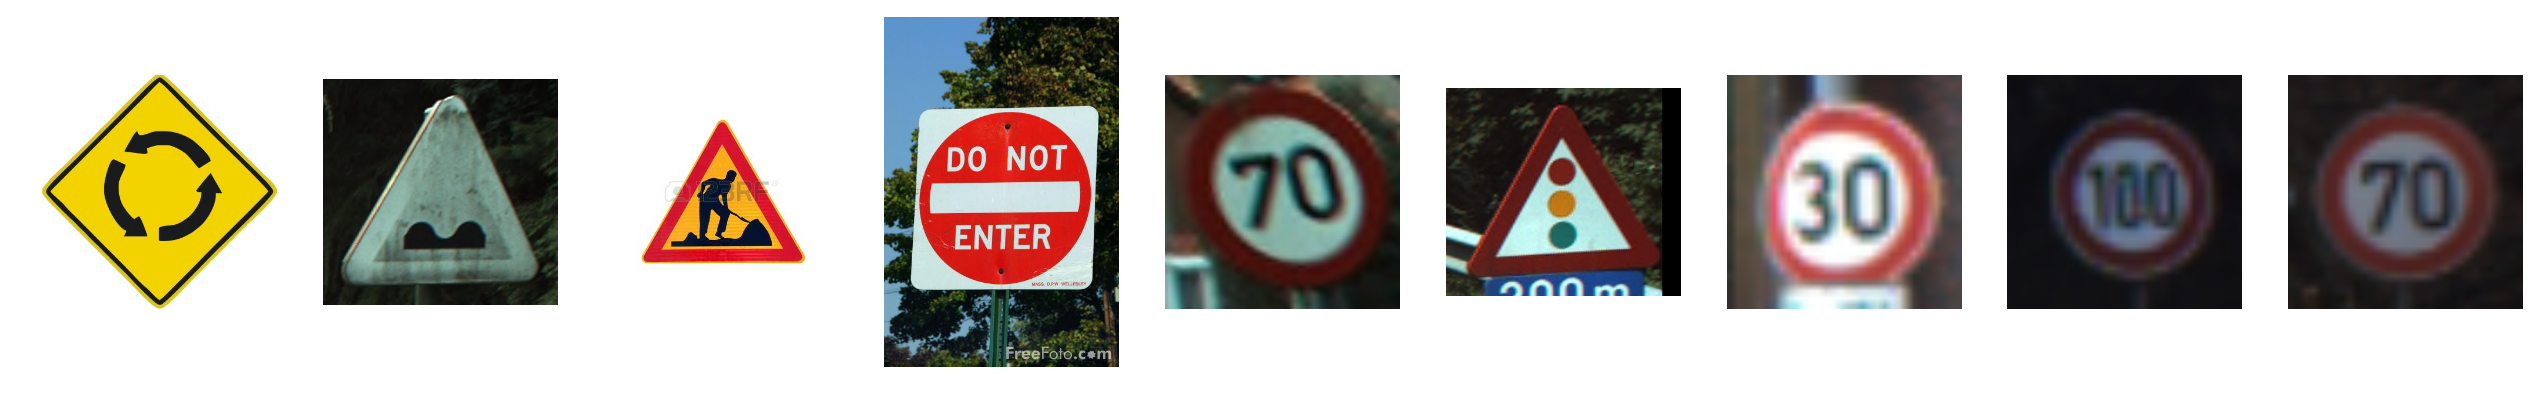

[False False  True  True False  True  True False False]
New accuracy at 0.4444444477558136
[0.99117625, 0.9208551, 0.89249671, 0.84264225, 0.72287697, 0.99982798, 0.68463826, 0.97861177, 0.88357228]
[14, 12, 25, 17, 1, 26, 1, 39, 39]


In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#Different images have been collected - a few from the Belgian traffic signs dataset and a few images
# are U.S traffic signs. 

# They are preprocessed in the below module 

# The NEW DATA has already been generated earlier and run in the same session- post processing of the data is done 
# in this module 

def display_images(images):
    plt.figure(figsize=(32, 32))
    i =1
    for image in images:
        plt.subplot(2, 9,i)  # 3 rows, 8 per row
        plt.axis('off')
        i+=1
        plt.imshow(image)
    plt.show()

display_images(images)

print(is_correct)
print('New accuracy at {}'.format(new_accuracy))


softmax = []
predicted_label = []

for pred in predicted:
    softmax.append(np.amax(pred))
    predicted_label.append(np.argmax(pred))

print(softmax)
print(predicted_label)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

The predictions have already been run in the previous modules in the same tensorflow session

Analysis of the predictions on the new data set - The model predicted 5 out of 9 images correctly. The images consisted of a combination of completely wrong images ( Roundabout is a different color), a few images which look different (U.S version of Do Not Enter) and some which are very similar ( taken from the Belgian traffic signs dataset). 

Signs which were interpreted correctly can be seen in the visualization above. 

Surprisingly the Do Not Enter sign was predicted correctly while two speed limit signs ( very similar to the ones existing in the German Data Set --> taken from the Belgian Dataset) were not. 

#### Modification based on Feedback Pt -2 ####################################
   The model has a final accuracy of 44% (4 out of 9 images) on the new data set of images. In comparison the final accuracy on the training data set is 
   The accuracy plot above analyzes and compares the performance of the model for the validation, training and new captured images. 
   
   The training set accuracy is ~97%. Comparitively the new image accuracy is either 44% or 55% and that is because the model is not trained on similar images to the new ones.
   
#### End of Modification #############################################




### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:** The model is able to recognize new signs added from the Belgian traffic signs dataset which has still images of live camera feed. Since the different images in the dataset have different angles, glare, lighting and have been taken at different time of day. The model is pretty robust to captured pictures from a live camera stream.

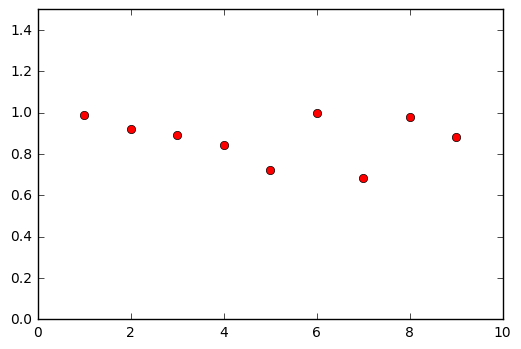

The top 5 predicted labels for Image  1  are: [14  0 17  7  2]
The top 5 predicted labels for Image  2  are: [12 22 15 26 40]
The top 5 predicted labels for Image  3  are: [25 11 28 23 22]
The top 5 predicted labels for Image  4  are: [17 14  9 26 10]
The top 5 predicted labels for Image  5  are: [ 1  4 41 42  0]
The top 5 predicted labels for Image  6  are: [26 18 24 27 30]
The top 5 predicted labels for Image  7  are: [ 1  5 40  4 25]
The top 5 predicted labels for Image  8  are: [39 40 37 34 33]
The top 5 predicted labels for Image  9  are: [39 40 37 34 33]


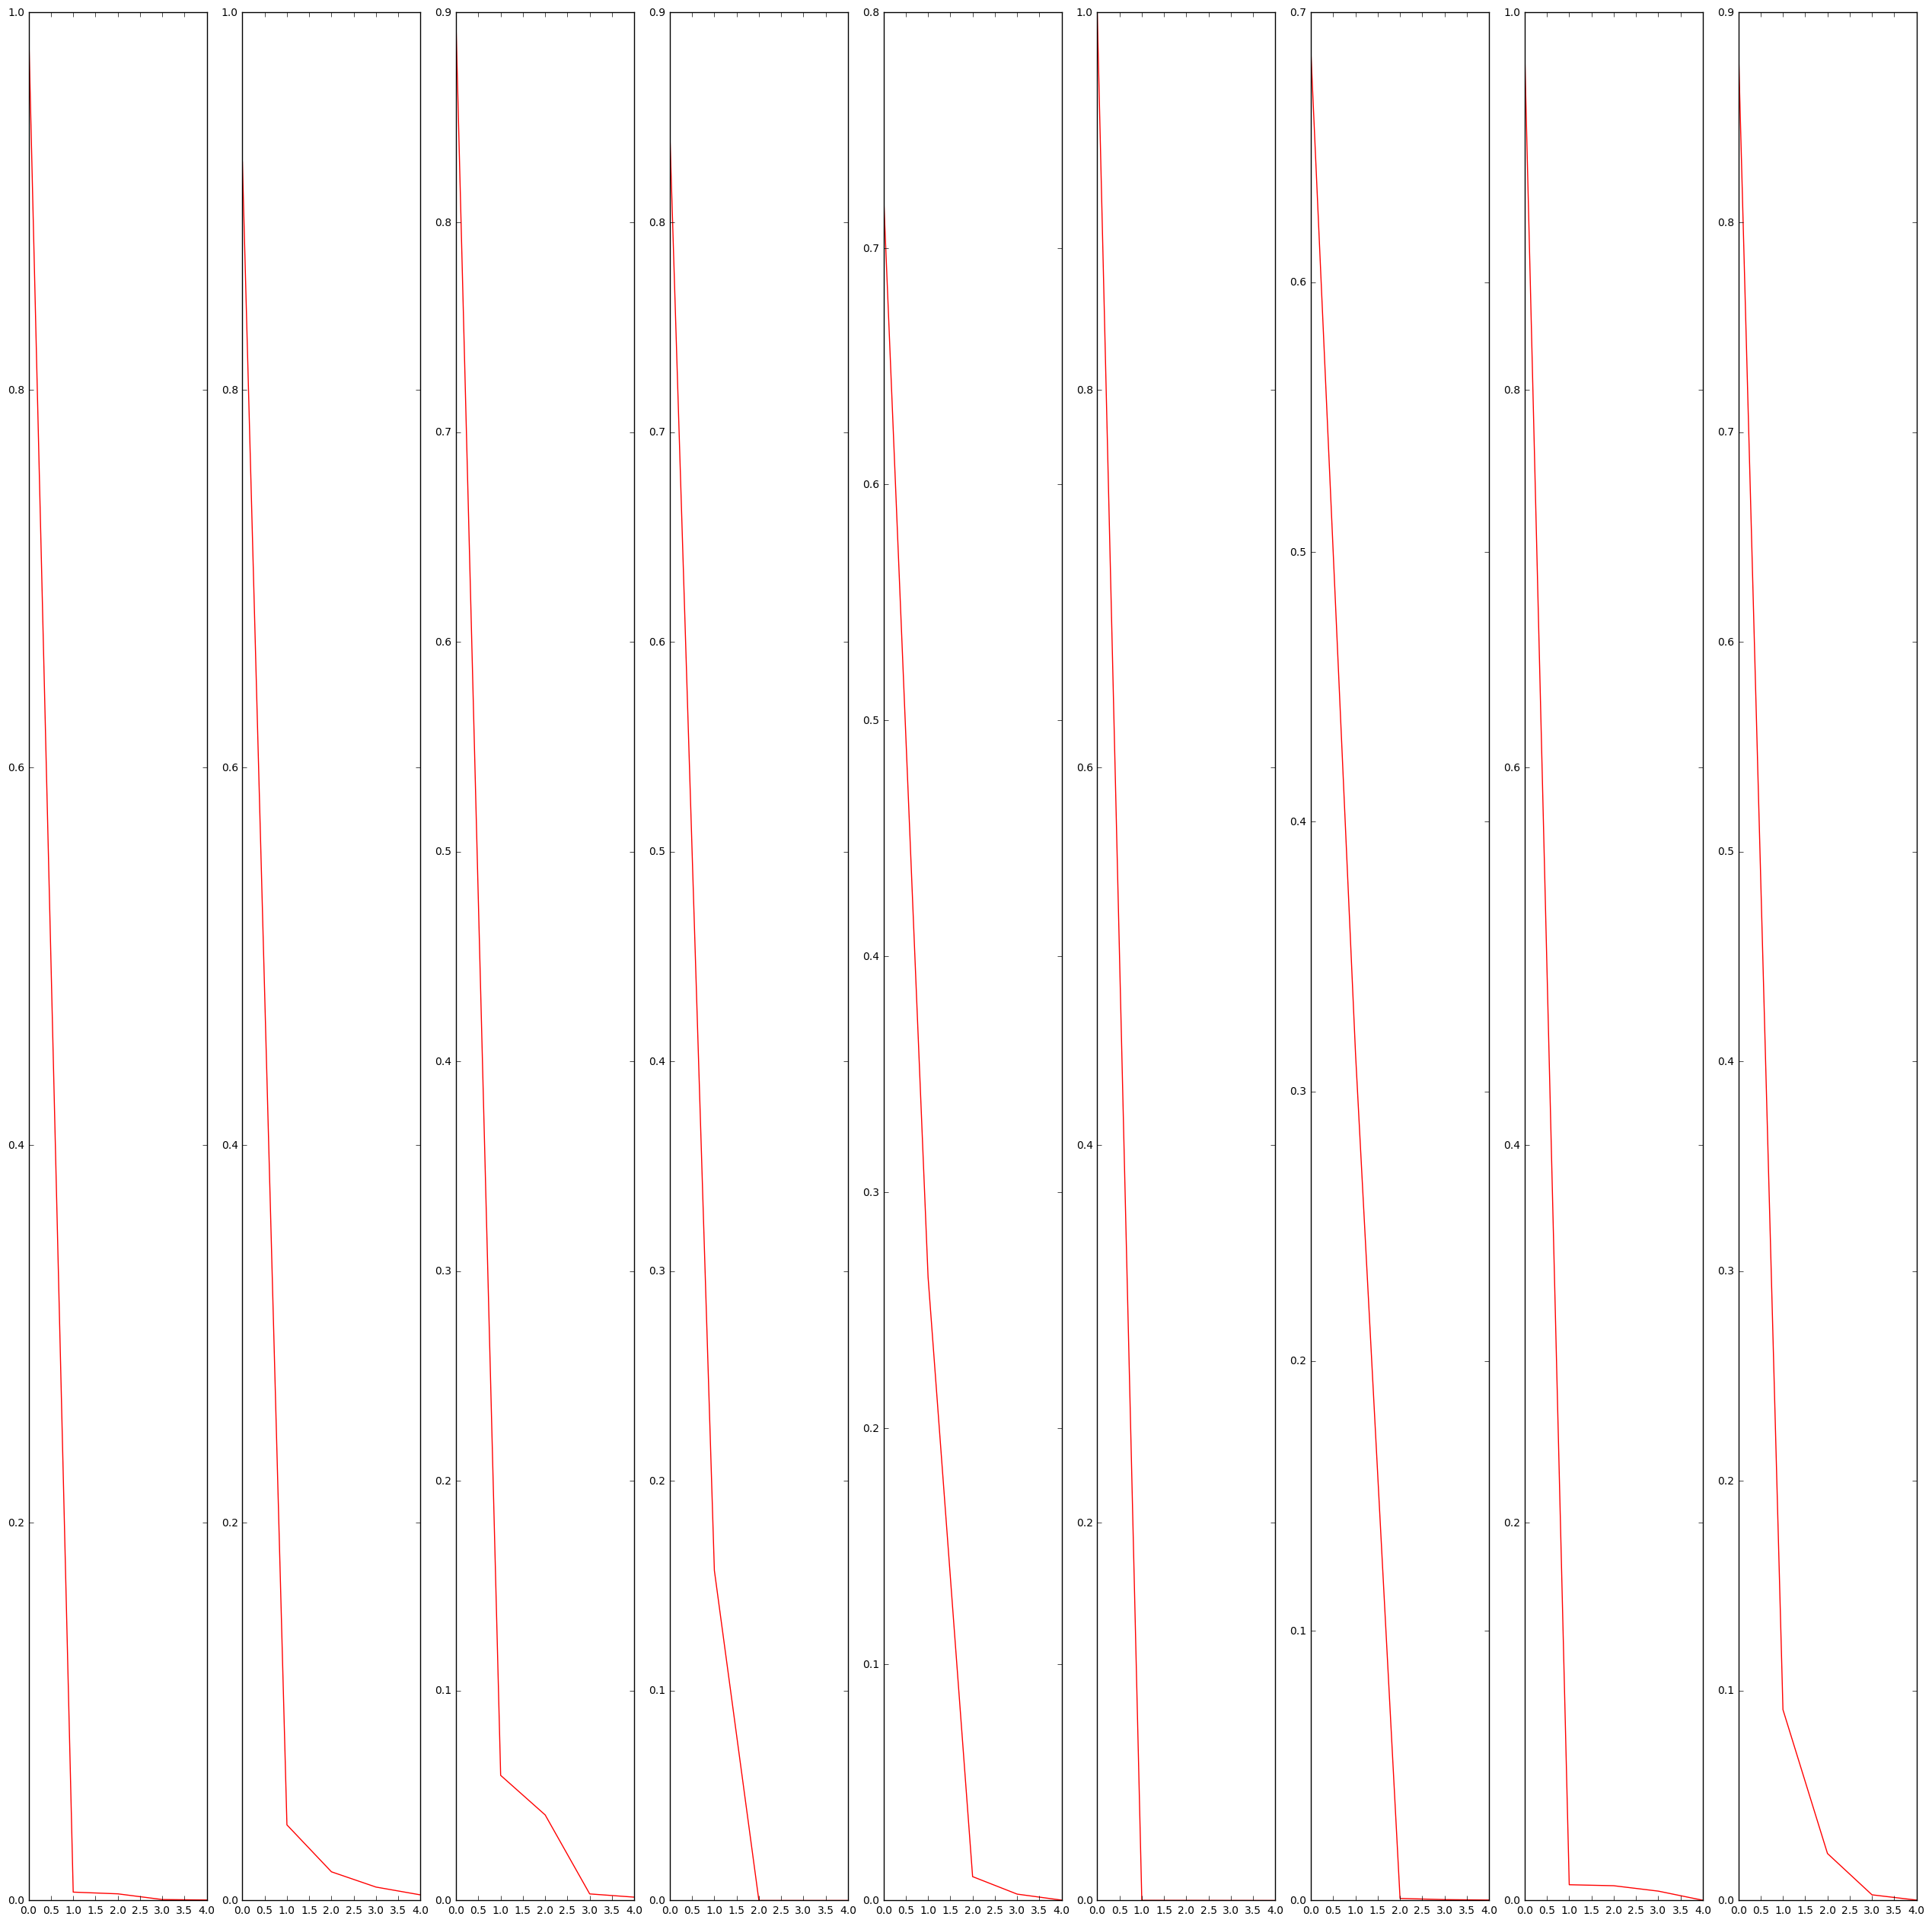

In [15]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5,6,7,8,9], softmax, 'ro')
plt.axis([0, 10, 0, 1.5])
plt.show()

for i in range(9):
    print("The top 5 predicted labels for Image ",i+1,' are:',top5.indices[i])
plt.figure(figsize=(32, 32))
plt.axis([0,5,0,1])
for i in range(9):
    plt.subplot(1,9,i+1)
    plt.plot(top5.values[i], color='red', label='image')
plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:** The final prediction of the new data set are plotted above . 

The model has pretty high prediction for sample 1, however it is predicted incorrectly. This version of the roundabout is very different from the one present in the training dataset. 

The model gets the prediction for speed Limit 30 and 70 ( last two samples wrong) but has very high softmax value for it. 

The overall validation set has a prediction accuracy of 95-96% when trained with different number of epochs and learning rate.

### Modification based on feedback - Pt No 3 #####
The tf.nn.top_k function is used to extract the top 5 values softmax prediction values and indices corresponding to it. 
The first choice has a softmax probability value ~0.7-0.9 for all nine images. This shows that the model has fairly high confidence in the predictions it is making for these images even though only half of them are predicted correctly. 
In a couple of images,it can be seen from the corresonding top5 indices that the correct prediction is in the top5 probabilities.

### End of Modification####

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:** The newly acquired images are stored in the new_images folder.

Steps for preprocessing the data to make it similar to the input provided. 

1. Read in the images using matplotlib
2. Convert it to a fixed 32,32,3 image size - our model works only on this size and the images were all of different sizes. The skimage.tranform function was used to convert the image to this standard size
3. Normalize these images - The above transform function normalizes all the values to 1. Hence it was important to normalize it with different xmin and xmax values

This image and corresponding label data was provided to a dictionary to keep track of how the model performs on the newly acquired images.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.